In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
benergy_c = np.arange(-7.5, -5.25, 0.25)
benergy_o = np.arange(-3.25, -5.5, -0.25)

In [3]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))

In [4]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[3.34472698e-01, 3.39231365e-01, 3.43974177e-01, 3.48933537e-01,
        3.53805206e-01, 3.58574738e-01, 3.61920092e-01, 3.56331117e-01,
        3.37657724e-01],
       [3.28533274e-01, 3.32081756e-01, 3.34938343e-01, 3.36558840e-01,
        3.36605648e-01, 3.34050485e-01, 3.20556065e-01, 2.65952313e-01,
        1.56534848e-01],
       [3.22721781e-01, 3.24506758e-01, 3.25480862e-01, 3.24254718e-01,
        3.19946102e-01, 3.06708407e-01, 2.35348070e-01, 1.28573863e-02,
        2.86525878e-03],
       [3.18202928e-01, 3.19391493e-01, 3.18920536e-01, 3.15556332e-01,
        3.05975939e-01, 2.59558304e-01, 4.26909990e-03, 5.45512506e-04,
        2.69875792e-04],
       [4.81476409e-12, 3.15230888e-01, 3.13982062e-01, 3.07922412e-01,
        2.84939373e-01, 6.28361115e-03, 1.61196623e-04, 4.37329722e-05,
        3.02454015e-05],
       [4.81739457e-12, 1.07766139e-02, 3.04515527e-01, 2.90737135e-01,
        1.56730045e-01, 9.85362170e-05, 8.53115055e-06, 4.16795459e-06,
        3.5

In [24]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,3.344727e-01,0.339231,0.343974,0.348934,3.538052e-01,3.585747e-01,3.619201e-01,3.563311e-01,3.376577e-01
-3.50,3.285333e-01,0.332082,0.334938,0.336559,3.366056e-01,3.340505e-01,3.205561e-01,2.659523e-01,1.565348e-01
-3.75,3.227218e-01,0.324507,0.325481,0.324255,3.199461e-01,3.067084e-01,2.353481e-01,1.285739e-02,2.865259e-03
-4.00,3.182029e-01,0.319391,0.318921,0.315556,3.059759e-01,2.595583e-01,4.269100e-03,5.455125e-04,2.698758e-04
-4.25,4.814764e-12,0.315231,0.313982,0.307922,2.849394e-01,6.283611e-03,1.611966e-04,4.373297e-05,3.024540e-05
-4.50,4.817395e-12,0.010777,0.304516,0.290737,1.567300e-01,9.853622e-05,8.531151e-06,4.167955e-06,3.522546e-06
-4.75,4.818217e-12,0.010759,0.270742,0.202066,2.165198e-04,2.533383e-06,6.041852e-07,4.370454e-07,4.096711e-07
-5.00,4.815915e-12,0.010758,0.100732,0.000547,1.574094e-06,1.145545e-07,5.553824e-08,4.792424e-08,4.664699e-08
-5.25,4.816573e-12,0.010750,0.004595,0.000002,2.778168e-08,6.962190e-09,4.951395e-09,4.636718e-09,4.577069e-09


In [25]:
# metals = {'Pt': {'C':-7.02516, 'O':-3.81153}, 'Pd':{'C':-7.16786, 'O':-4.13577}, 'Rh':{'C':-7.33484, 'O':-4.71419}, 
#           'Ru': {'C':-7.5979, 'O':-5.4492}, 'Ni': {'C':-6.79794, 'O':-4.98902}}
metals = {'Pt': {'C':-7.02516, 'O':-3.81153}, 'Pd':{'C':-7.16786, 'O':-4.13577}, 'Rh':{'C':(-6.65 - 7.11) / 2, 'O':(-4.31 - 4.88) / 2}, 'Ni': {'C':-6.79794, 'O':-4.98902}}
metal_x = []
metal_y = []
metal_names = []
for i, v in metals.items():
    metal_x.append(abs(v['C'] + 7.5) / 2.25 * 9)
    metal_y.append(abs(v['O'] + 3.125) / 2.25 * 9)
    metal_names.append(i)

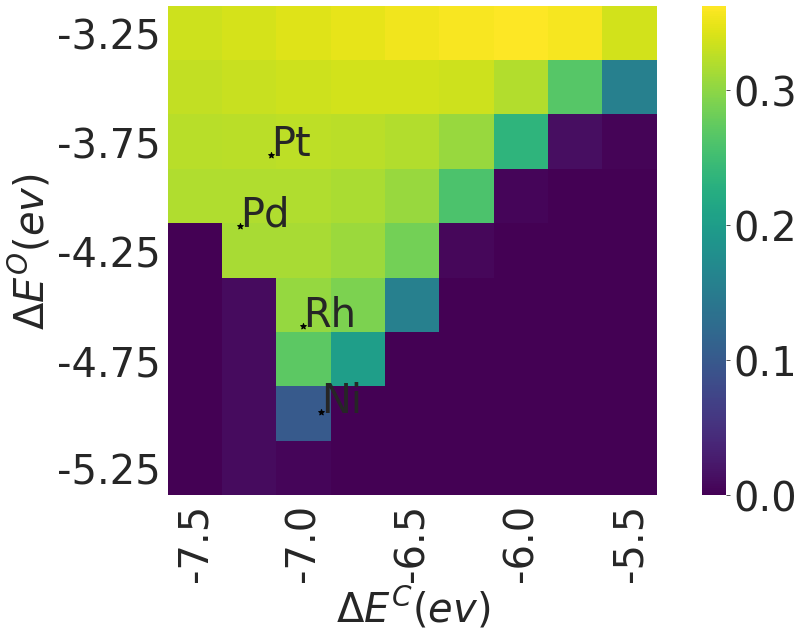

In [26]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/complete_0.6_ch4_conv_bma.pdf', bbox_inches='tight')
plt.savefig('paper_plots/0.6_ch4_conv_bma.pdf', bbox_inches='tight')

# Heatmap For Syngas Conversion

In [20]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 in'].to_list()[0]
            syngas_conv = (co_out + h2_out/2) / ch4_in
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[3.30286140e-01, 3.41648280e-01, 3.51405786e-01, 3.55757468e-01,
        3.50740578e-01, 3.30921084e-01, 2.89892771e-01, 2.28517390e-01,
        1.68898662e-01],
       [3.19372104e-01, 3.29824028e-01, 3.39191985e-01, 3.43753353e-01,
        3.39483321e-01, 3.19981801e-01, 2.71960690e-01, 1.76232744e-01,
        6.58310809e-02],
       [3.12085428e-01, 3.19545413e-01, 3.28207950e-01, 3.32210916e-01,
        3.26681762e-01, 2.99358233e-01, 1.87895690e-01, 1.25542724e-05,
        3.33618560e-06],
       [3.11211731e-01, 3.15890001e-01, 3.21393571e-01, 3.23675740e-01,
        3.13075482e-01, 2.43222728e-01, 6.19383890e-06, 1.42489253e-06,
        7.71988101e-07],
       [2.00229745e-10, 3.17480573e-01, 3.19536672e-01, 3.16402603e-01,
        2.87413265e-01, 4.08532507e-05, 1.86945403e-06, 4.21486253e-07,
        1.93182354e-07],
       [2.01052394e-10, 2.15019718e-02, 3.18567186e-01, 3.01938542e-01,
        1.23686874e-01, 5.88108017e-06, 4.73463472e-07, 1.05965098e-07,
        3.7

In [21]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,3.302861e-01,0.341648,0.351406,0.355757,3.507406e-01,3.309211e-01,2.898928e-01,2.285174e-01,1.688987e-01
-3.50,3.193721e-01,0.329824,0.339192,0.343753,3.394833e-01,3.199818e-01,2.719607e-01,1.762327e-01,6.583108e-02
-3.75,3.120854e-01,0.319545,0.328208,0.332211,3.266818e-01,2.993582e-01,1.878957e-01,1.255427e-05,3.336186e-06
-4.00,3.112117e-01,0.315890,0.321394,0.323676,3.130755e-01,2.432227e-01,6.193839e-06,1.424893e-06,7.719881e-07
-4.25,2.002297e-10,0.317481,0.319537,0.316403,2.874133e-01,4.085325e-05,1.869454e-06,4.214863e-07,1.931824e-07
-4.50,2.010524e-10,0.021502,0.318567,0.301939,1.236869e-01,5.881080e-06,4.734635e-07,1.059651e-07,3.778995e-08
-4.75,2.010011e-10,0.021512,0.302015,0.209402,4.054574e-05,7.079183e-07,6.726794e-08,1.356407e-08,3.617798e-09
-5.00,2.005518e-10,0.021514,0.148541,0.000519,1.128886e-06,3.606103e-08,4.371312e-09,8.576124e-10,2.285932e-10
-5.25,2.006058e-10,0.021499,0.008705,0.000002,1.966633e-08,1.395674e-09,2.138212e-10,5.147381e-11,2.260989e-11


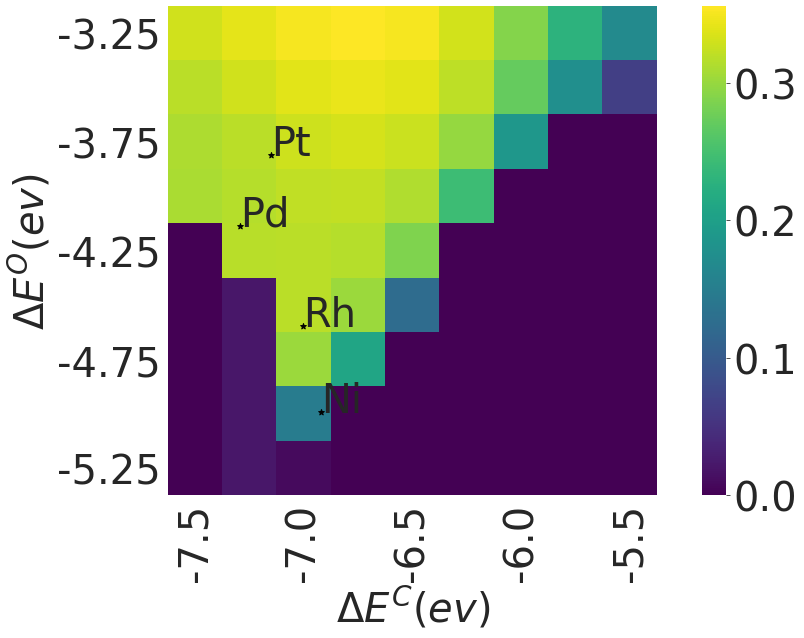

In [22]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/complete_0.6_syngas_conv_bma.pdf', bbox_inches='tight')
plt.savefig('paper_plots/0.6_syngas_conv_bma.pdf', bbox_inches='tight')

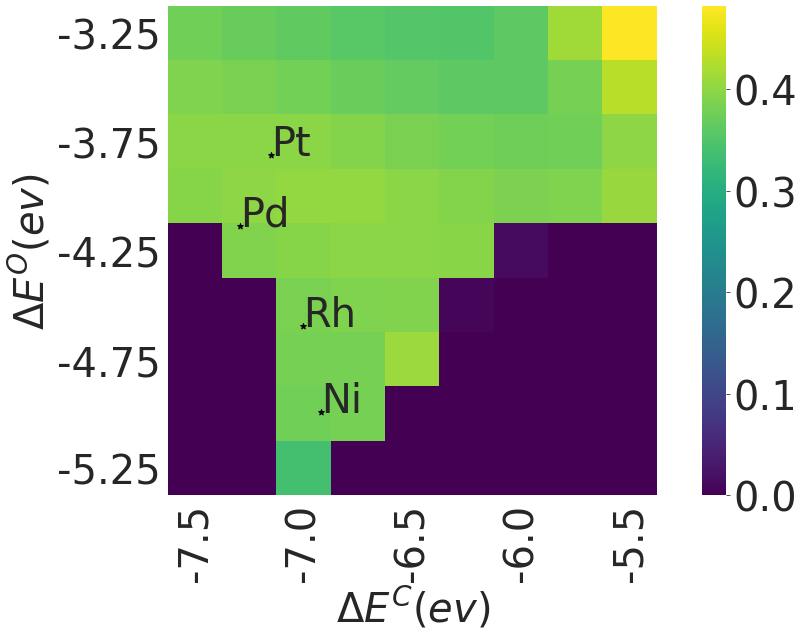

In [16]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'H2O out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 in'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = (abs(h2o_out)/2 + abs(co2_out)) / ch4_in
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=0.6 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/0.6_full_conv_bma.pdf', bbox_inches='tight')
plt.savefig('paper_plots/complete_0.6_full_conv_bma.pdf', bbox_inches='tight')

# Plots at C/O=1.0

In [13]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            syngas_conv = (co_out + h2_out/2) / ch4_in            
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
            data_syngas[j][i] = syngas_conv
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[6.27867326e-12, 3.95827872e-03, 1.47874696e-01, 2.42555208e-01,
        2.42169514e-01, 2.31722766e-01, 2.23137610e-01, 2.20196410e-01,
        2.16103220e-01],
       [6.28124649e-12, 4.88034396e-03, 1.85351627e-01, 2.61617475e-01,
        2.56120049e-01, 2.36673310e-01, 2.13960196e-01, 1.85698486e-01,
        1.50999541e-01],
       [6.27800198e-12, 5.62807740e-03, 2.50759610e-01, 2.84680003e-01,
        2.66880103e-01, 2.39709201e-01, 1.95685632e-01, 9.02084854e-02,
        7.70270471e-03],
       [6.27363869e-12, 5.92505424e-03, 2.81579645e-01, 2.97476539e-01,
        2.73564520e-01, 2.35170520e-01, 5.61315022e-02, 1.10977687e-03,
        4.86399609e-04],
       [6.27296741e-12, 5.99210402e-03, 9.11742495e-02, 3.03042883e-01,
        2.74020567e-01, 1.50421078e-01, 3.54051371e-04, 7.96774686e-05,
        5.18765719e-05],
       [6.27923266e-12, 6.00276376e-03, 4.24113063e-02, 3.01148269e-01,
        2.41373188e-01, 3.10443747e-04, 1.65550123e-05, 7.18941131e-06,
        5.9

In [14]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,6.278673e-12,0.003958,0.147875,0.242555,2.421695e-01,2.317228e-01,2.231376e-01,2.201964e-01,2.161032e-01
-3.50,6.281246e-12,0.004880,0.185352,0.261617,2.561200e-01,2.366733e-01,2.139602e-01,1.856985e-01,1.509995e-01
-3.75,6.278002e-12,0.005628,0.250760,0.284680,2.668801e-01,2.397092e-01,1.956856e-01,9.020849e-02,7.702705e-03
-4.00,6.273639e-12,0.005925,0.281580,0.297477,2.735645e-01,2.351705e-01,5.613150e-02,1.109777e-03,4.863996e-04
-4.25,6.272967e-12,0.005992,0.091174,0.303043,2.740206e-01,1.504211e-01,3.540514e-04,7.967747e-05,5.187657e-05
-4.50,6.279233e-12,0.006003,0.042411,0.301148,2.413732e-01,3.104437e-04,1.655501e-05,7.189411e-06,5.909072e-06
-4.75,6.278450e-12,0.006005,0.033461,0.269158,1.162055e-03,5.967960e-06,1.069051e-06,7.326810e-07,6.792921e-07
-5.00,6.275653e-12,0.006005,0.030348,0.004969,4.934004e-06,2.170121e-07,9.354306e-08,7.885468e-08,7.640335e-08
-5.25,6.290756e-12,0.006004,0.027286,0.000007,5.090419e-08,1.024347e-08,7.125972e-09,6.639577e-09,6.538750e-09


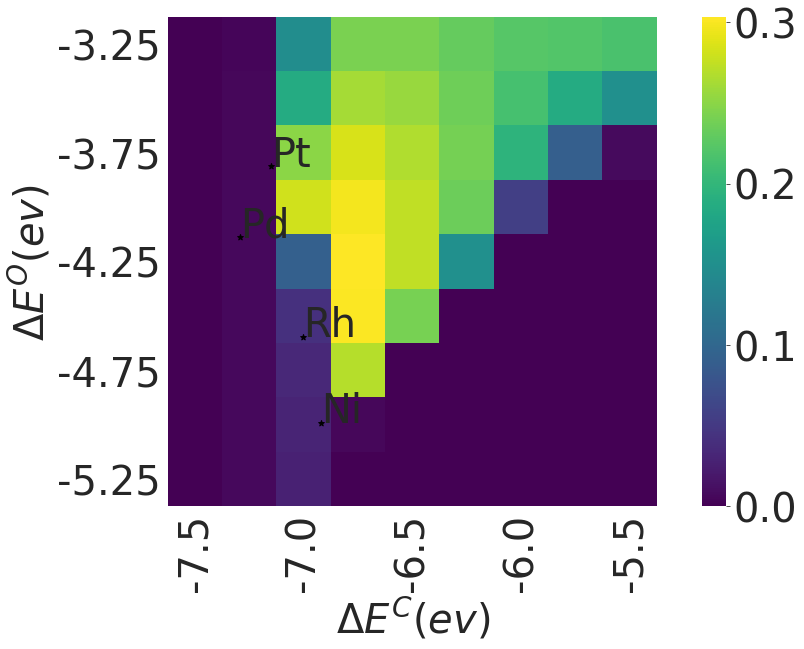

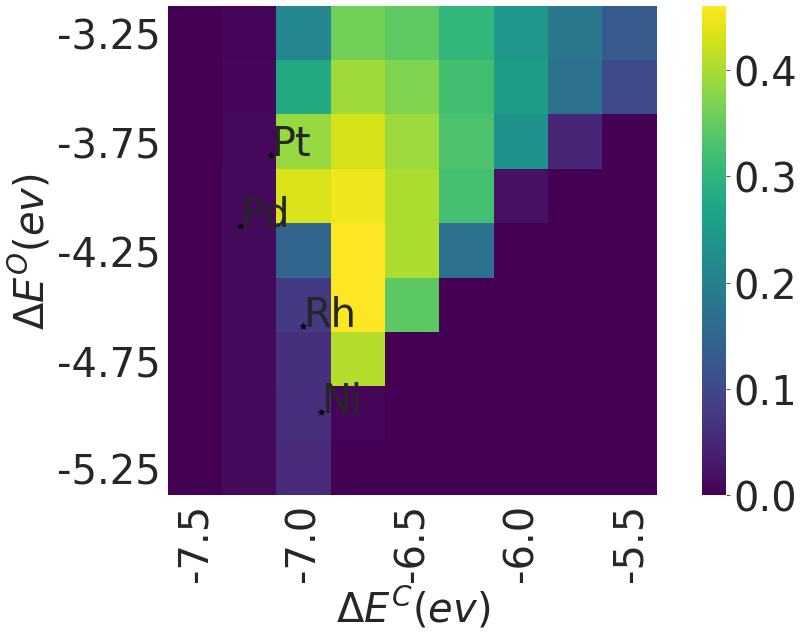

In [15]:
# plot CH4 conversion
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
# cmap = sns.color_palette("Blues", as_cmap=True)
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=1 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/1_ch4_conv_bma.pdf', bbox_inches='tight')
# plt.savefig('paper_plots/complete_1_ch4_conv_bma.pdf', bbox_inches='tight')



syngas_conv_df = pd.DataFrame(data_syngas, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
# cmap = sns.color_palette("Blues", as_cmap=True)
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=1 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/1_syngas_conv_bma.pdf', bbox_inches='tight')
# plt.savefig('paper_plots/complete_1_syngas_conv_bma.pdf', bbox_inches='tight')

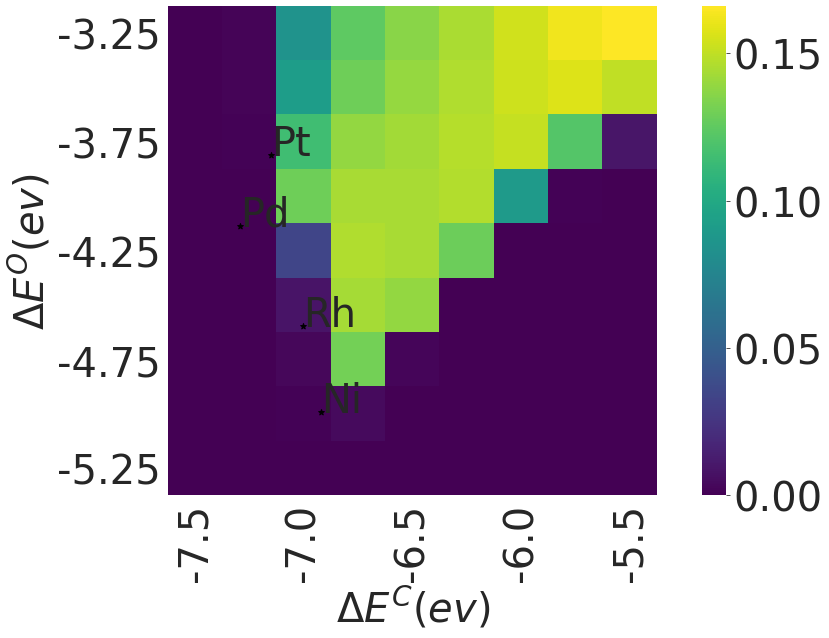

In [16]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'H2O out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 in'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = (abs(h2o_out)/ 2 + abs(co2_out))/ch4_in
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=1.0 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/1_full_conv_bma.pdf', bbox_inches='tight')
# plt.savefig('paper_plots/complete_1_full_conv_bma.pdf', bbox_inches='tight')

# Plots at C/O=2.6

In [17]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
#             ch4_conv = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'Max CH4 Conv'].to_list()[0]
            h2_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            syngas_conv = (co_out + h2_out/2) / ch4_in    
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
            data_syngas[j][i] = syngas_conv
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[9.32796404e-12, 2.02187244e-11, 1.25446355e-02, 7.13776542e-02,
        8.25430848e-02, 8.04320037e-02, 7.50866985e-02, 7.11677491e-02,
        7.08777937e-02],
       [9.30374742e-12, 7.13505379e-11, 1.40315794e-02, 7.63880970e-02,
        9.01140160e-02, 8.64126919e-02, 7.71896725e-02, 6.75062703e-02,
        6.01168739e-02],
       [9.32378002e-12, 2.01942542e-11, 1.55870214e-02, 9.12659470e-02,
        1.00592896e-01, 9.20317423e-02, 7.87417746e-02, 5.96140443e-02,
        4.18800118e-02],
       [9.32479433e-12, 2.01818289e-11, 1.47133211e-02, 1.06306745e-01,
        1.10509894e-01, 9.71485333e-02, 7.31566892e-02, 1.05535267e-02,
        1.80947222e-03],
       [1.71410579e-11, 2.01800538e-11, 1.32433731e-02, 1.15898713e-01,
        1.20307755e-01, 9.92964546e-02, 3.57380201e-03, 2.87164516e-04,
        1.50949736e-04],
       [9.26875377e-12, 2.01780252e-11, 1.26730345e-02, 1.13045240e-01,
        1.29035249e-01, 3.75081648e-02, 7.89622606e-05, 2.15760748e-05,
        1.5

[Text(0.5, 1.0, 'Syngas Conversion at C/O=2.6 with BMA'),
 Text(0.5, 30.0, '$\\Delta E^C(ev)$'),
 Text(318.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

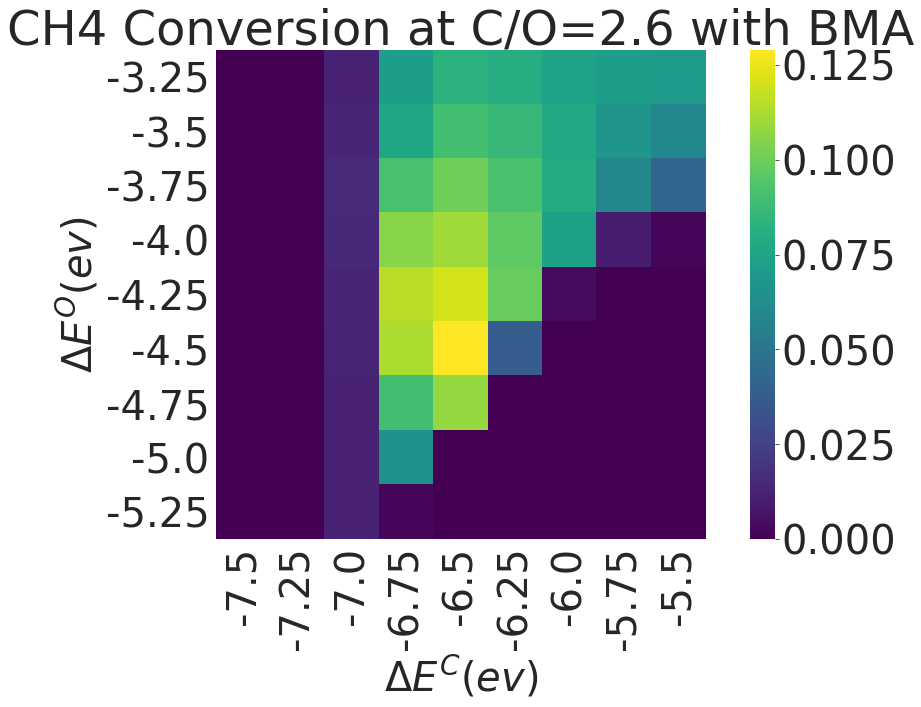

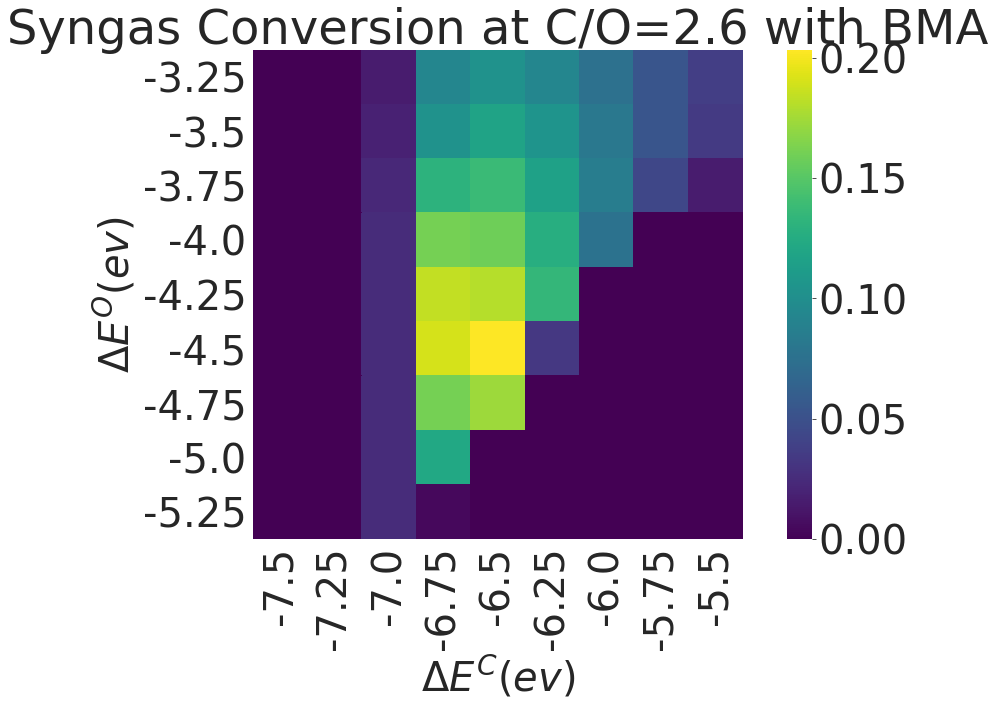

In [18]:
# plot CH4 conversion
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
# cmap = sns.color_palette("Blues", as_cmap=True)
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
ax.set(title="CH4 Conversion at C/O=2.6 with BMA",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))





syngas_conv_df = pd.DataFrame(data_syngas, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
ax.set(title="Syngas Conversion at C/O=2.6 with BMA",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

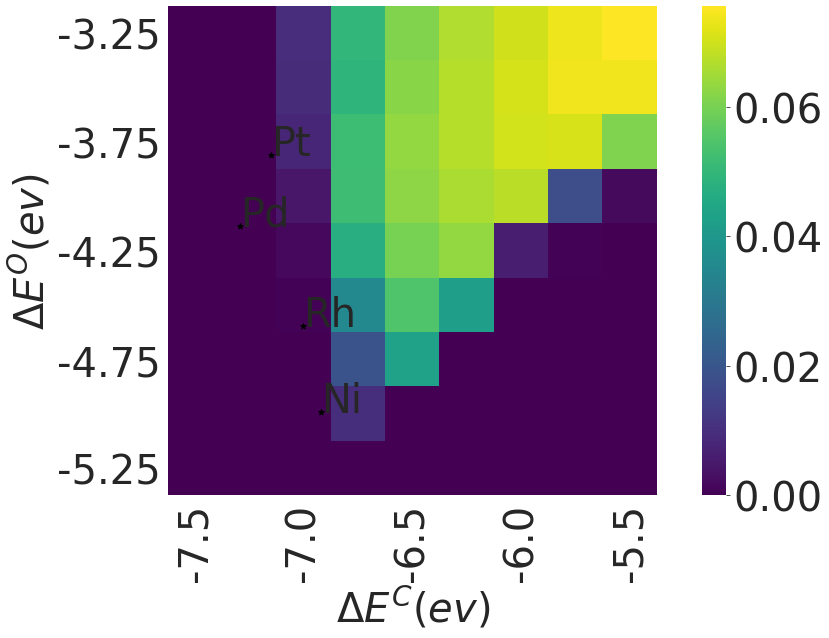

In [19]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'H2O out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 in'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = (abs(h2o_out)/2 + abs(co2_out)) / ch4_in
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=1 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/2.6_full_conv_bma.pdf', bbox_inches='tight')